In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

Был загружен набор данных

In [ ]:
df = pd.read_csv("/content/5gym_churn.csv")

Была проведена предварительная обработка данных

Была выведена информация о количестве нуль строк в датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

По результатам вывода была получена информация о том, что нуль строки отсутствуют, также можно сделать вывод о том, что в Month_to_end_contract неправильный тип данных (float64, хотя должен быть Int64).

Датасет содержит следующие данные:
*   1 Gender - Пол

*   2 Near_Location - Близкое расположение

*   3 Partner - Сотрудник компании партнера

*   4 Promo_friends - По промо друзей

*   5 Phone -  Указан ли телефон

*   6 Contract_period - Длительность текущего абонемента

*   7 Group_visits - Посещение групповых занятий

*   8 Age - Возраст

*   9 Avg_additional_charges_total - Средние траты на дополнительные услуги

*   10 Month_to_end_contract - Количество месяцев до окончания абонемента

*   11 Lifetime - время с момента первого обращения в фитнесцентр (в месяцах)

*   12 Avg_class_frequency_total - средняя частота посещений в неделю за все время с начала действия абонемента

*   13 Month_to_end_contract - средняя частота посещений в неделю за предыдущий месяц

*   14 Churn - факт ухода из клуба

Было подсчитано количество дубликатов

In [ ]:
df.duplicated().sum()

0

Не было найдено дубликатов

Тип данных для столбца Month_to_end_contract был изменен на int.

In [ ]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype(int)

В данном наборе данных можно выделить целевой переменной переменную Churn, которую можно было бы предсказать

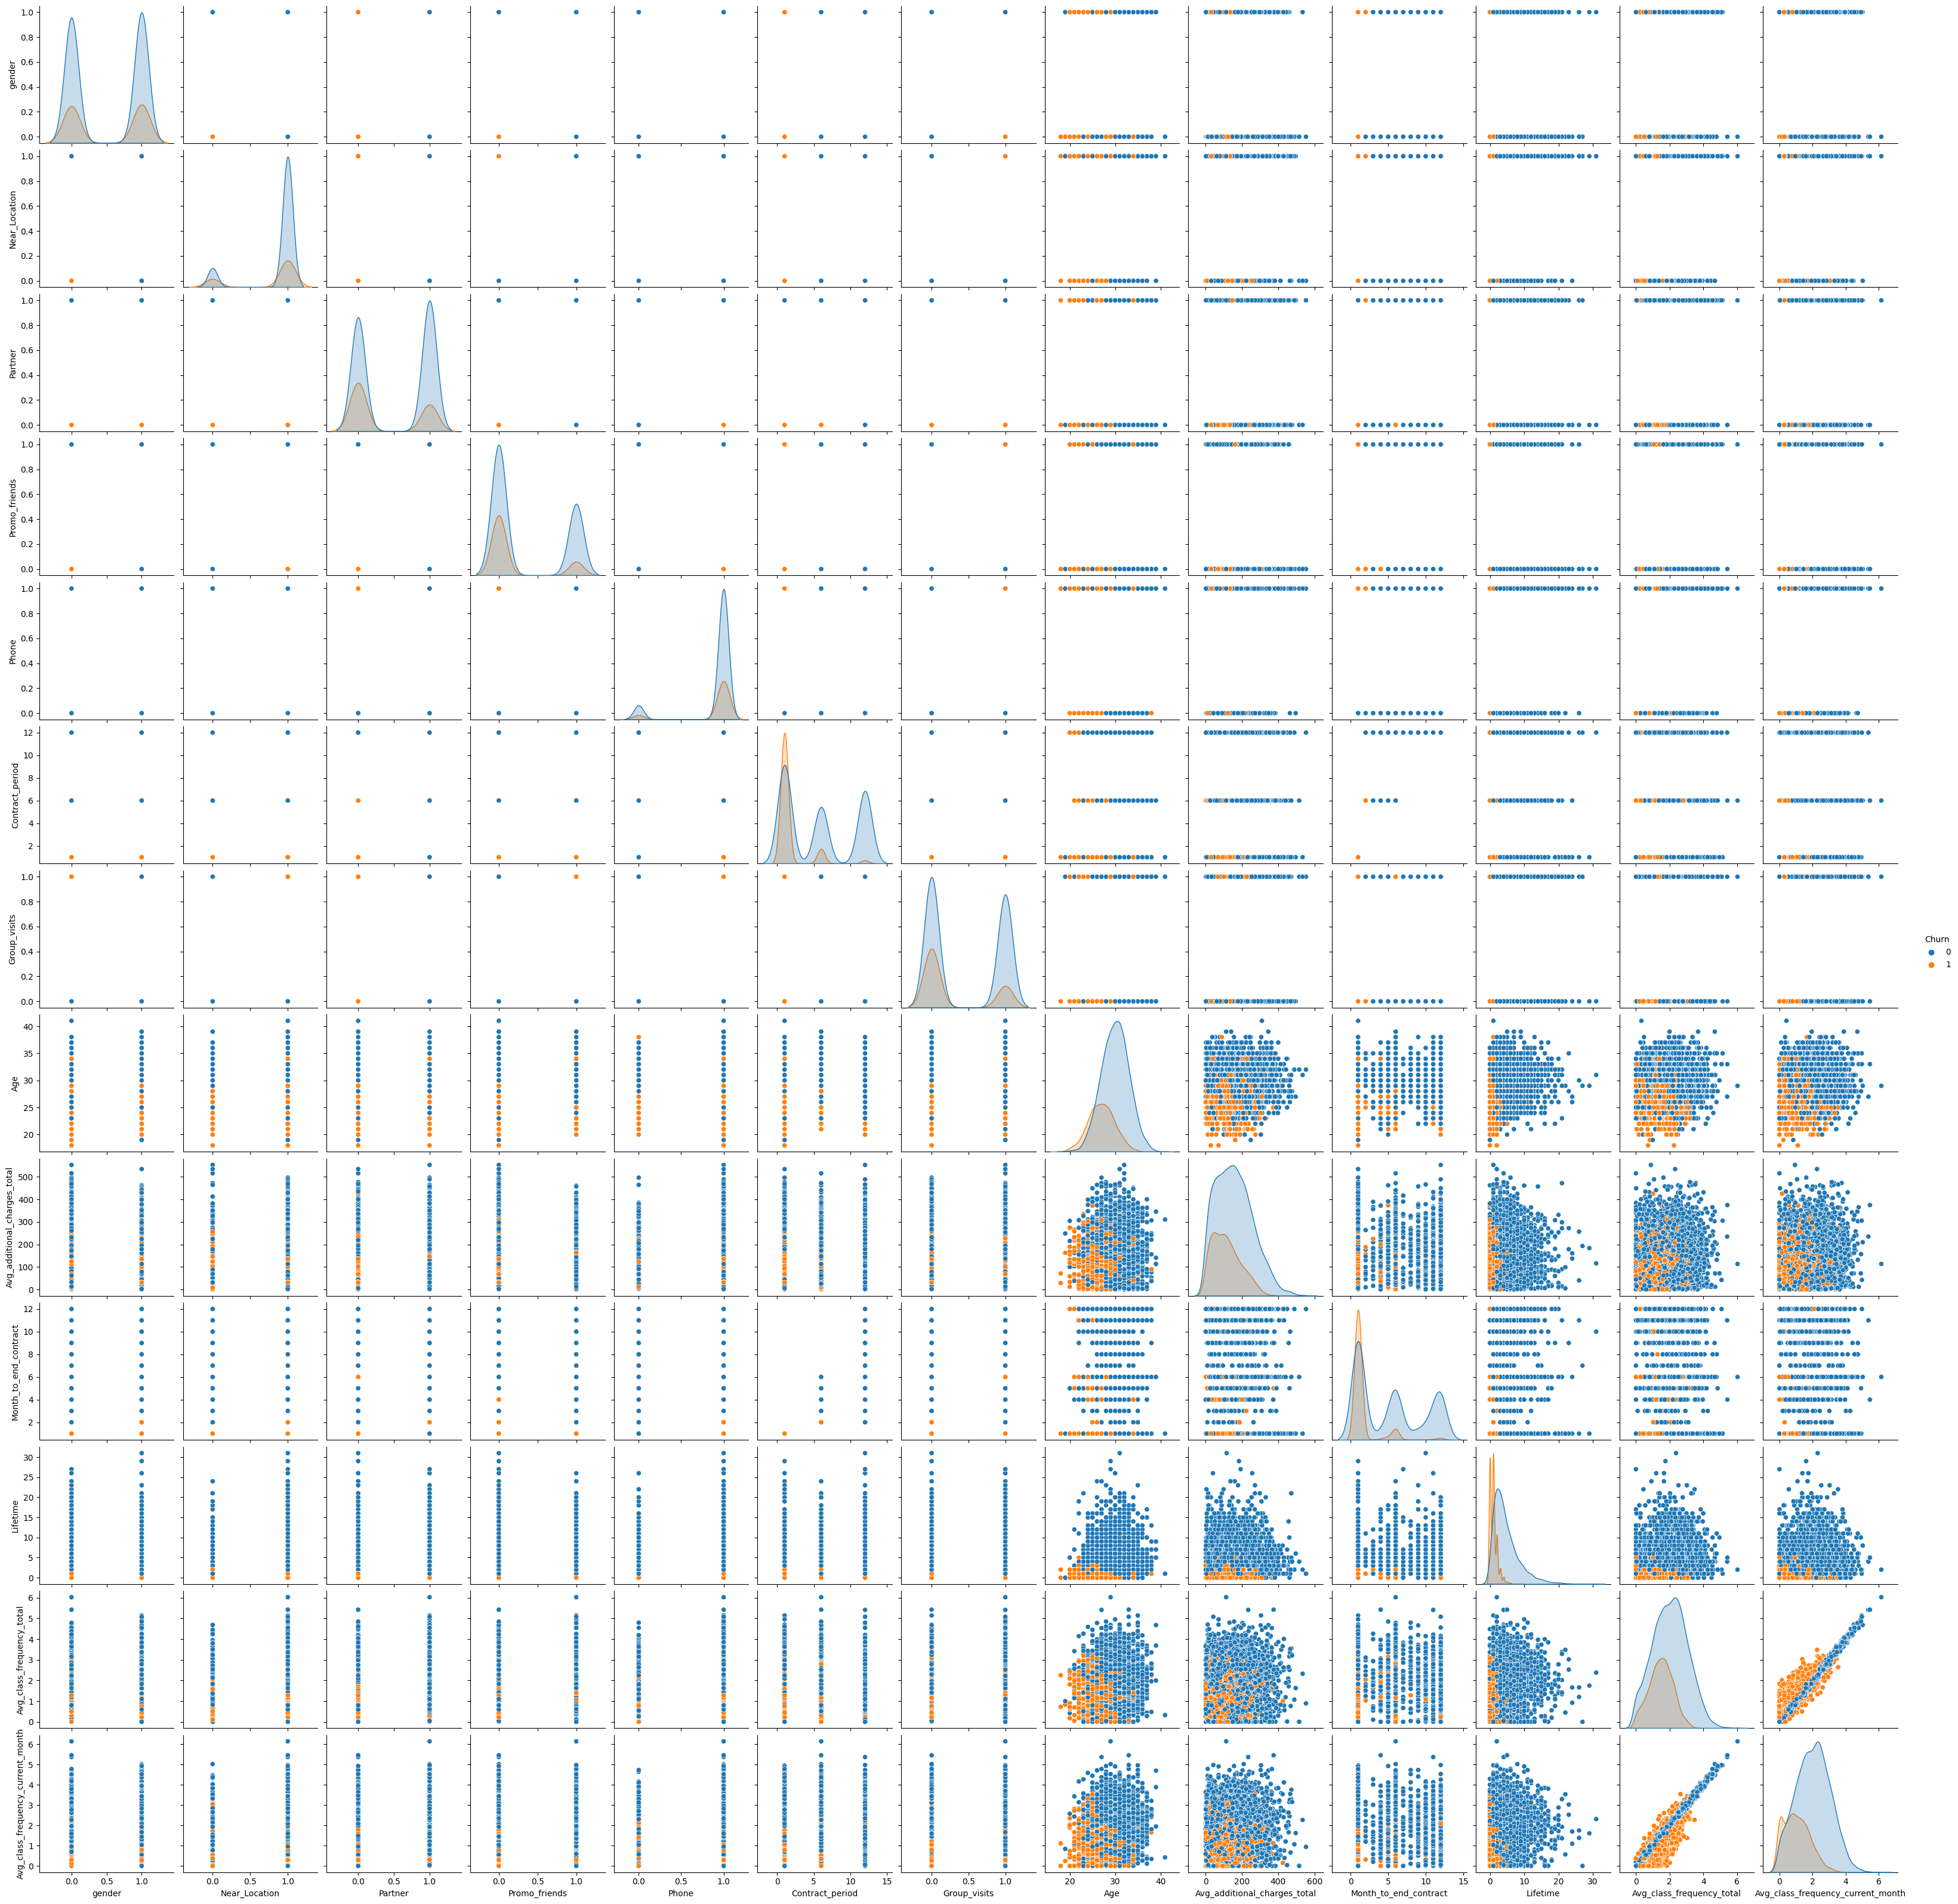

In [ ]:
sns.pairplot(df, y_vars = ['gender','Near_Location','Partner','Promo_friends','Phone', 'Contract_period','Group_visits','Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month'], hue = 'Churn')

По данной матрице рассеяния можно сделать выводы, что

*   Уходят из клуба чаще те, у кого время с момента первого обращения в фитнесцентр меньшее
*   Уходят из клуба чаще те, кто меньше всего дней в неделю и в месяц посещал фитнесцентр

*   Также можно сказать, что чем ниже возраст тем чаще посетители прекращают посещать фитнесцентр



Набор данных был разбит на тренировочные и тестовые датасеты и была выполнена стандартизация данных.

In [ ]:
x = np.array(df.drop(['Churn'], axis = 1))
y = np.array(df['Churn'])

X_train,X_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.25,random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
print(X_train)
print("X_valid: ", X_valid)

[[ 0.98609664  0.41898519 -0.97173269 ... -0.72538312 -0.1873997
  -1.00800909]
 [-1.01409939  0.41898519  1.0290896  ...  0.60575791  1.16442558
   1.22686403]
 [-1.01409939  0.41898519  1.0290896  ... -0.45915491  0.88529875
   1.04772478]
 ...
 [-1.01409939  0.41898519 -0.97173269 ... -0.19292671 -0.76823103
  -0.57508631]
 [ 0.98609664  0.41898519 -0.97173269 ... -0.45915491  0.04227662
  -0.02589767]
 [ 0.98609664  0.41898519 -0.97173269 ...  0.87198612  0.45355819
   0.59639907]]
X_valid:  [[-1.01409939  0.41898519  1.0290896  ... -0.45915491  0.47917834
   0.52739892]
 [-1.01409939 -2.38671921 -0.97173269 ... -0.99161132 -0.89577366
  -0.97805627]
 [-1.01409939 -2.38671921  1.0290896  ... -0.45915491 -1.92148393
  -1.66553544]
 ...
 [ 0.98609664  0.41898519 -0.97173269 ... -0.45915491  0.7151971
   0.6714275 ]
 [-1.01409939  0.41898519 -0.97173269 ... -0.72538312  0.36633276
   0.48541485]
 [ 0.98609664  0.41898519  1.0290896  ... -0.19292671 -0.52462225
  -0.55260407]]


Была разработа предсказательная модель качественного отклика методами: метод k- ближайших соседей, дерево решений, логистическая регрессия, случайный лес.

# **К-ближайшие соседи**

Была реализована модель K-ближайших соседей с параметром n_neighbors (количество соседей) = 5, остальные параметры заданы по умолчанию (weights (веса, присваемые точкам) = 'uniform' (все точки имеют одинаковый вес), algorithm = 'auto' (выбор наиболее подходящего алгоритма на основе переданных данных), p = 2 (Параметр метрики Минковского (по умолчанию соответствует евклидову растоянию))). Также был создан и выведен датафрейм с валидационными целевыми переменными и предсказанными.

In [ ]:
neighboor_model = KNeighborsClassifier(n_neighbors = 5)
neighboor_model.fit(X_train, y_train)
neighboor_model_preds = neighboor_model.predict(X_valid)
df_neighboor = pd.DataFrame({"Actuals":y_valid,"Predicts":neighboor_model_preds})
print(df_neighboor.head(10))

   Actuals  Predicts
0        0         0
1        1         1
2        0         0
3        1         1
4        0         0
5        0         0
6        0         0
7        0         0
8        1         1
9        0         0


# **Дерево решений**

Была реализована модель дерево решений с параметрами по умолчанию (criterion = 'gini' (функция измерения каччества разделения, в данном случае используется индекс Джини), max_depth = None (максимальная глубина дерева, в данном случае узлы разделяются до тех пор, пока все листья не будут "чистыми". Также был создан датафрейм с валидационными целевыми переменными и с предсказанными.

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

decision_tree_preds = decision_tree.predict(X_valid)
df_tree = pd.DataFrame({"Actual" : y_valid, "Predicts" : decision_tree_preds})
print(df_tree.head(10))

   Actual  Predicts
0       0         0
1       1         1
2       0         0
3       1         1
4       0         0
5       0         0
6       0         0
7       0         0
8       1         1
9       0         0


# **Логистическая регрессия**

Была рализована модель логистической регрессии с параметрами по умолчанию (class_weight = None (веса классов), random_state = None (начальное состояние генератора случайных чисел), max_iter = 100 (максимальное количество итераций)). Также был создан датафрейм с валидационными целевыми переменными и предсказанными.

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression = logistic_regression.predict(X_valid)
df_logreg = pd.DataFrame({"Actual" : y_valid, "Predicts" : logistic_regression})
print(df_logreg.head(10))

   Actual  Predicts
0       0         0
1       1         1
2       0         0
3       1         1
4       0         0
5       0         0
6       0         0
7       0         0
8       1         0
9       0         0


# **Случайный лес**

Была реализована модель случайный лес с параметрами по умолчанию (max_leaf_nodes = None (максимальное число листовых узлов, в данном случае - не ограничено),random_state = None (начальное состояние генератора случайных чисел), class_weight = None - веса классов. Также был создан датафрейм с валидационными целевыми переменными и с предсказанными.

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_valid)
df_randfor = pd.DataFrame({"Actual" : y_valid, "Predicts" : random_forest_preds})
print(df_randfor.head(10))

   Actual  Predicts
0       0         0
1       1         1
2       0         0
3       1         1
4       0         0
5       0         0
6       0         0
7       0         0
8       1         1
9       0         0


Были подсчитаны метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score' для каждой из моделей

# **К-ближайшие соседи**

Были подсчитаны метрики Accuracy, Precision Precision, Recall, Balanced Accuracy, F1 score для модели К-ближайших соседей.

In [ ]:

#neighboor_model_preds = np.where(y_valid > 0.5, 1, 0)
print("Метрика Accuracy =", accuracy_score(y_valid, neighboor_model_preds)) #показывает, как много значений было верно предсказано
print("Метрика Precision =",precision_score(y_valid, neighboor_model_preds)) # показывает, как много значений среди  положительных действительно оказались таковыми
print("Метрика Recall =",recall_score(y_valid, neighboor_model_preds)) # показывает, как много значений среди положительных было правильно предсказано
print("Метрика Balanced Accuracy =",balanced_accuracy_score(y_valid, neighboor_model_preds)) # делает то же самое, что и Accuracy, только учитывает несбалансированность классов
print("Метрика F1 score =",f1_score(y_valid, neighboor_model_preds)) # объединяет точность и полноту в одно число

Метрика Accuracy = 0.879
Метрика Precision = 0.7683397683397684
Метрика Recall = 0.7653846153846153
Метрика Balanced Accuracy = 0.8421517671517671
Метрика F1 score = 0.766859344894027


По данным метрикам можно сделать вывод, что модель достаточно точно предсказывает значения, т.к. каждое из значений метрик достаточно близко к 1, однако при изменении некоторых параметров модель может достичь лучших результатов.

# **Дерево решений**

Были подсчитаны метрики Accuracy, Precision Precision, Recall, Balanced Accuracy, F1 score для модели Дерева решений.

In [ ]:

print("Метрика Accuracy =", accuracy_score(y_valid, decision_tree_preds)) #показывает, как много значений было верно предсказано
print("Метрика Precision =",precision_score(y_valid, decision_tree_preds)) # показывает, как много значений среди  положительных действительно оказались таковыми
print("Метрика Recall =",recall_score(y_valid, decision_tree_preds)) # показывает, как много значений среди положительных было правильно предсказано
print("Метрика Balanced Accuracy =",balanced_accuracy_score(y_valid, decision_tree_preds)) # делает то же самое, что и Accuracy, только учитывает несбалансированность классов
print("Метрика F1 score =",f1_score(y_valid, decision_tree_preds)) # объединяет точность и полноту в одно число

Метрика Accuracy = 0.891
Метрика Precision = 0.789272030651341
Метрика Recall = 0.7923076923076923
Метрика Balanced Accuracy = 0.858991683991684
Метрика F1 score = 0.7907869481765835


По данным метрикам можно сделать вывод, что модель достаточно точно предсказывает значения, т.к. каждое из значений метрик достаточно близко к 1, однако при изменении некоторых параметров модель может достичь лучших результатов

# **Логистическая регрессия**

Были подсчитаны метрики Accuracy, Precision Precision, Recall, Balanced Accuracy, F1 score для модели Логистической регрессии.

In [ ]:

print("Метрика Accuracy =", accuracy_score(y_valid, logistic_regression)) #показывает, как много значений было верно предсказано
print("Метрика Precision =",precision_score(y_valid, logistic_regression)) # показывает, как много значений среди  положительных действительно оказались таковыми
print("Метрика Recall =",recall_score(y_valid, logistic_regression)) # показывает, как много значений среди положительных было правильно предсказано
print("Метрика Balanced Accuracy =",balanced_accuracy_score(y_valid, logistic_regression)) # делает то же самое, что и Accuracy, только учитывает несбалансированность классов
print("Метрика F1 score =",f1_score(y_valid, logistic_regression)) # объединяет точность и полноту в одно число

Метрика Accuracy = 0.925
Метрика Precision = 0.8627450980392157
Метрика Recall = 0.8461538461538461
Метрика Balanced Accuracy = 0.8994282744282744
Метрика F1 score = 0.854368932038835


По данным метрикам можно сделать вывод, что модель достаточно точно предсказывает значения, т.к. каждое из значений метрик достаточно близко к 1, однако при изменении некоторых параметров модель может достичь лучших результатов

# **Случайный лес**

Были подсчитаны метрики Accuracy, Precision Precision, Recall, Balanced Accuracy, F1 score для модели Случайный лес.

In [ ]:

print("Метрика Accuracy =", accuracy_score(y_valid, random_forest_preds)) #показывает, как много значений было верно предсказано
print("Метрика Precision =",precision_score(y_valid, random_forest_preds)) # показывает, как много значений среди  положительных действительно оказались таковыми
print("Метрика Recall =",recall_score(y_valid, random_forest_preds)) # показывает, как много значений среди положительных было правильно предсказано
print("Метрика Balanced Accuracy =",balanced_accuracy_score(y_valid, random_forest_preds)) # делает то же самое, что и Accuracy, только учитывает несбалансированность классов
print("Метрика F1 score =",f1_score(y_valid, random_forest_preds)) # объединяет точность и полноту в одно число

Метрика Accuracy = 0.921
Метрика Precision = 0.8634538152610441
Метрика Recall = 0.8269230769230769
Метрика Balanced Accuracy = 0.8904885654885655
Метрика F1 score = 0.8447937131630648


По данным метрикам можно сделать вывод, что модель достаточно точно предсказывает значения, т.к. каждое из значений метрик достаточно близко к 1, однако при изменении некоторых параметров модель может достичь лучших результатов

По данным значениям, можно сделать вывод, что лучше всего предсказывает значения модель логистической регрессии, т.к. все значения более близки к 1, чем у остальных моделей.

Была построена матрциа неточностей для каждого из методов. В данной матрице значение с индексом 0,0 показывает количество верно предсказанных положительных значений, значение с индексом 0,1 показывает количество неверно предсказанных отрицательных значений, значение с индексом 1,0 - количество неверно преддсказанных положительных значений, значение с индексом 1,1 - количество верно предсказанных отрицательных значений

# **К-ближайшие соседи**

Была построена матрица неточностей для модели К-ближайших соседей.

In [ ]:
confusion_matrix(y_valid, neighboor_model_preds)


array([[680,  60],
       [ 61, 199]])

В данном случае, верно предсказанных положительных значений - 680, верно предсказанных отрицательных значений - 199, неверно предсказанных положительных значений - 61, неверно предсказанных отрицательных значений - 60. Данная модель достаточно точно предсказывает значения, однако при изменении некоторых параметров может улучшить точность.

# **Дерево решений**

Была построена матрица неточностей для модели Дерева решений.

In [ ]:
confusion_matrix(y_valid, decision_tree_preds)

array([[685,  55],
       [ 54, 206]])

В данном случае, верно предсказанных положительных значений - 685, верно предсказанных отрицательных значений - 206, неверно предсказанных положительных значений - 54, неверно предсказанных отрицательных значений - 55. Данная модель достаточно точно предсказывает значения, однако при изменении некоторых параметров может улучшить точность.

# **Логистическая регрессия**

Была построена матрица неточностей для модели Логистической регресии

In [ ]:
confusion_matrix(y_valid, logistic_regression)

array([[705,  35],
       [ 40, 220]])

В данном случае, верно предсказанных положительных значений - 705, верно предсказанных отрицательных значений - 220, неверно предсказанных положительных значений - 40, неверно предсказанных отрицательных значений - 35. Данная модель достаточно точно предсказывает значения, однако при изменении некоторых параметров может улучшить точность.

# **Случайный лес**

Была построена матрица неточностей для модели Случайного леса

In [ ]:
confusion_matrix(y_valid, random_forest_preds)

array([[706,  34],
       [ 45, 215]])

В данном случае, верно предсказанных положительных значений - 706, верно предсказанных отрицательных значений - 215, неверно предсказанных положительных значений - 45, неверно предсказанных отрицательных значений - 34. Данная модель достаточно точно предсказывает значения, однако при изменении некоторых параметров может улучшить точность.

По результатам вывода матриц неточностей, можно сделать вывод, что наиболее точно предсказывает значения модель логистической регрессии, т.к. у неё наименьшее количество неправильно предсказанных значений и наибольшее количество правильно предсказанных значений

Был построен графики ROC-кривой для каждого из методов на одном графике.

Text(0.5, 1.0, 'ROC-кривая и AUC')

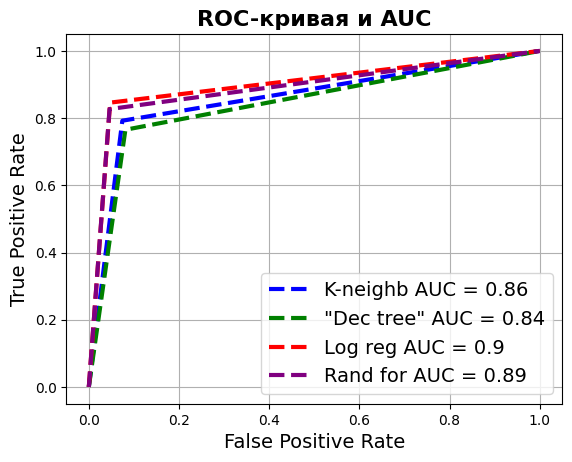

In [ ]:
fpr_neighb, tpr_neighb, _neighb = roc_curve(y_valid, neighboor_model_preds)
roc_auc_neighb = auc(fpr_neighb, tpr_neighb)

fpr_dec_tree, tpr_dec_tree, _dec_tree = roc_curve(y_valid, decision_tree_preds)
roc_auc_dec_tree = auc(fpr_dec_tree, tpr_dec_tree)

fpr_log_reg, tpr_log_reg, _log_reg = roc_curve(y_valid, logistic_regression)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_rand_forest, tpr_rand_forest, _rand_forest = roc_curve(y_valid, random_forest_preds)
roc_auc_rand_forest = auc(fpr_rand_forest, tpr_rand_forest)

plt.plot(fpr_dec_tree, tpr_dec_tree, label=f'K-neighb AUC = {round(roc_auc_dec_tree,2)}', color = 'blue',linestyle = '--',linewidth = 3)

plt.plot(fpr_neighb, tpr_neighb, label=f'"Dec tree" AUC = {round(roc_auc_neighb,2)}', color = 'green',linestyle = '--',linewidth = 3)

plt.plot(fpr_log_reg, tpr_log_reg, label=f'Log reg AUC = {round(roc_auc_log_reg,2)}', color = 'red',linestyle = '--',linewidth = 3)

plt.plot(fpr_rand_forest, tpr_rand_forest, label=f'Rand for AUC = {round(roc_auc_rand_forest,2)}', color = 'purple',linestyle = '--',linewidth = 3)

plt.legend(loc=0,prop={'size': 14})
plt.ylabel('True Positive Rate',fontsize=14)
plt.xlabel('False Positive Rate',fontsize=14)
plt.grid(True)
plt.title("ROC-кривая и AUC", fontsize=16,fontweight=1000)

Данный график отображает точность предсказывания значений для каждой из моделей. По данному графику можно сделать вывод, что наиболее точно предсказывает значения модель логистической регрессии, т.к. площадь под графиком (AUC) близка к единице, а сам график максимально приближен к левому верхнему углу, что говорит нам о максимальной точности предсказываемых значений.

# **Вывод**

Были подсчитаны и исследованы метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", 'F1 score' для каждой из моделей. Данные метрики показывают, насколько точно модель предсказывает значения. Также предсказанные значения были проанализированы с помощью матрицы неточностей, которая показывает количество верно и неверно предсказанных положительных и негативных значений. В завершении работы был построен граифк ROC кривой, который визуализирует предсказанные значния и показывает, какая из моделей наиболее точно предсказывает значения. В данной работе был проанализирован датасет фитнесцентра, целевой переменной была выбрана переменная Churn, которая говорит нам о том, активен ли абонимент пользователя или нет. По данному набору данных были сделаны выводы о том, что  уходят из клуба чаще те, у кого время с момента первого обращения в фитнесцентр меньшее, уходят из клуба чаще те, кто меньше всего дней в неделю и в месяц посещал фитнесцентр, также можно сказать, что чем ниже возраст тем чаще посетители прекращают посещать фитнесцентр.

Написать программу, которая для дерева решений для разного параметра max_depth будет считать accuracy_score для тренировочных и тестовых данных (использовать predict на X_train и X_valid). Выполнить визуализацию: по оси х - значение параметра max_depth (от 1 до 16), по оси y - Accuracy, построить две линии для тренировочных и тестовых данных.

Max_depths:  range(1, 17)
accyracy_valid:  [0.5705, 0.617, 0.6165, 0.624, 0.6155, 0.6065, 0.6135, 0.6115, 0.61, 0.6095, 0.6085, 0.605, 0.605, 0.6065, 0.6065, 0.6085]
accuracy_train:  [0.8095, 0.861, 0.882, 0.9155, 0.923, 0.9355, 0.951, 0.969, 0.9775, 0.987, 0.994, 0.997, 0.9995, 1.0, 1.0, 1.0]


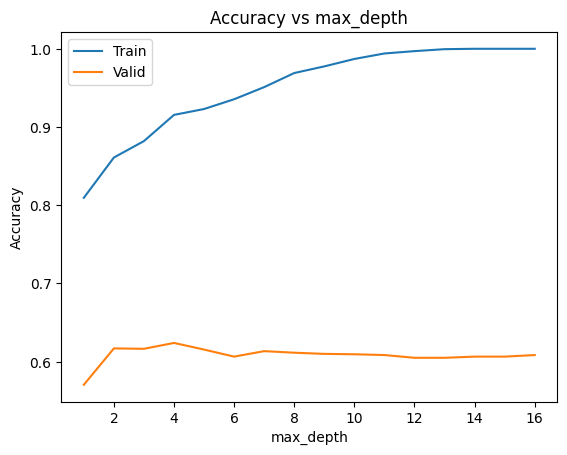

In [ ]:
max_depths_arr = range(1,17)
accuracy_score_valid = []
accuracy_score_train = []
df = pd.read_csv("/content/5gym_churn.csv")
x = np.array(df.drop(['Churn'], axis = 1))
y = np.array(df['Churn'])

X_train,X_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.5,random_state = 0)

for i in range (1,17):
  decision_tree = DecisionTreeClassifier(max_depth = i)
  decision_tree.fit(X_train, y_train)

  train_preds = decision_tree.predict(X_train)
  valid_preds = decision_tree.predict(X_valid)

  train_accuracy = accuracy_score(y_train, train_preds)
  valid_accuracy = accuracy_score(y_train,valid_preds)

  accuracy_score_valid.append(valid_accuracy)
  accuracy_score_train.append(train_accuracy)

print("Max_depths: ", max_depths_arr)
print("accyracy_valid: ", accuracy_score_valid)
print("accuracy_train: ", accuracy_score_train)

plt.plot(max_depths_arr, accuracy_score_train, label='Train')
plt.plot(max_depths_arr, accuracy_score_valid, label='Valid')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.legend()
plt.show()



По данному графику можно сделать вывод, что на тренировчных данных модель более точно предсказывает значения, что объяснимо тем, что модель на этих данных обучалась, также можно сказать о том, что при большем значении параметра max_depth модель более точно предсказывает значения. В случае метрик, основанных на значениях X_Valid, можно сказать, что лучшим образом предсказала значения модель с параметром max_depth = 4, в целом же, можно сказать, что на данных значениях модель предсказывает значения менее точно, однако эти предсказанные значения верно отображают работу модели, т.к. она не была обучена на них.